In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from datetime import datetime, time
#import pandas_datareader.data as pdr
import pandas_datareader.data as pdr
import yfinance as yf

In [4]:
#yf.pdr_override()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts 

In [6]:

today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "AAPL"
try:
    data =yf.download(stock_symbol, start=five_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

            Close   High    Low   Open     Volume
Date                                             
2020-03-04  73.47  73.63  71.14  71.94  219178400
2020-03-05  71.09  72.69  70.72  71.72  187572800
2020-03-06  70.14  70.58  68.25  68.44  226176800
2020-03-09  64.59  67.49  63.82  64.01  286744800
2020-03-10  69.25  69.51  65.37  67.26  285290000


In [7]:
data_return = pd.DataFrame(data['Close'], index=data.index, columns=['Close'])



In [8]:
data_return.head()

,Close
Date,
2020-03-04,73.47
2020-03-05,71.09
2020-03-06,70.14
2020-03-09,64.59
2020-03-10,69.25


In [9]:
data_return['daily_return'] = data_return['Close'].pct_change()
data_return.head()

,Close,daily_return
Date,,
2020-03-04,73.47,NaN
2020-03-05,71.09,-0.032394
2020-03-06,70.14,-0.013363
2020-03-09,64.59,-0.079127
2020-03-10,69.25,0.072147


In [10]:
data_return['log_return'] = np.log(data_return['Close']/data_return['Close'].shift(1))
data_return = data_return.dropna()


In [11]:
data_return.head()

,Close,daily_return,log_return
Date,,,
2020-03-05,71.09,-0.032394,-0.032930
2020-03-06,70.14,-0.013363,-0.013453
2020-03-09,64.59,-0.079127,-0.082434
2020-03-10,69.25,0.072147,0.069664
2020-03-11,66.84,-0.034801,-0.035421


In [12]:
def check_statioinary(df):
    stationary_result = ts.adfuller(df,autolag='AIC')
    print("ADF test statistic", stationary_result[0] )
    print("pvalue", stationary_result[1])
    print("Lag", stationary_result[2])
    print("critical values",stationary_result[4])


In [13]:
from statsmodels.tsa.stattools import kpss

In [14]:
def kpss_test(df):
    result = kpss(df, regression='c',nlags="auto")
    print("Tets statistic", result[0])
    print("p-value",result[1] )
    print("Lag", result[2])
    print("critical values",result[3])

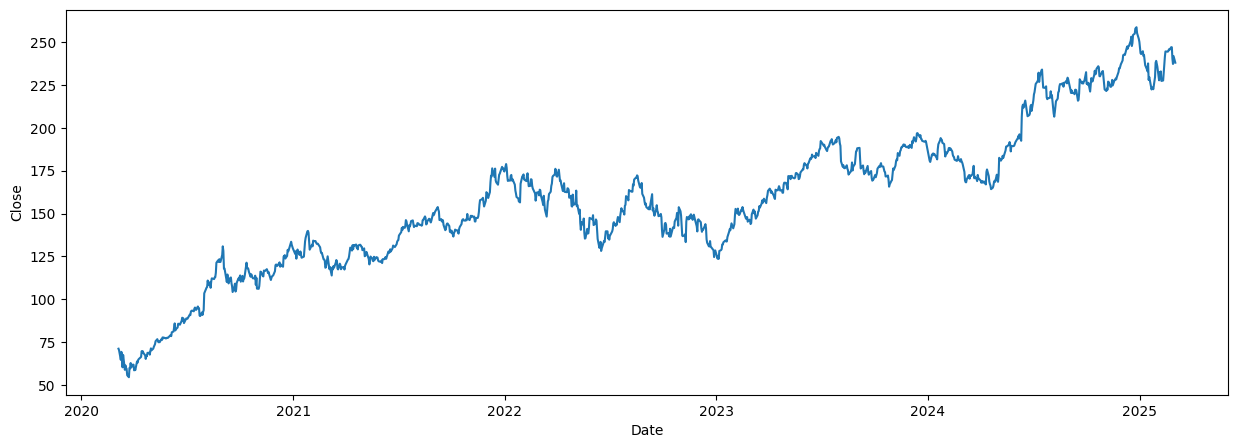

In [15]:
#Plot price data
fig, axs = plt.subplots( figsize=(15,5))
sns.lineplot(data_return['Close'])
plt.show()

In [16]:
#Usind AD Fuller test
check_statioinary(data['Close'])



ADF test statistic -1.2218908053554867
pvalue 0.6641086698135338
Lag 0
critical values {'1%': -3.435571295403709, '5%': -2.863845736356174, '10%': -2.567997600196822}


In [17]:
#using KPSS test
kpss_test(data['Close'])

Tets statistic 4.939824344387704
p-value 0.01
Lag 20
critical values {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_1085/1382218819.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df, regression='c',nlags="auto")


In [18]:
#Differencing
data_return_diff = data_return['Close'].diff()
data_return_diff = data_return_diff.dropna()
data_return['data_diff'] = data_return_diff
print(data_return_diff)
check_statioinary(data_return_diff)

Date
2020-03-06   -0.95
2020-03-09   -5.55
2020-03-10    4.66
2020-03-11   -2.41
2020-03-12   -6.60
              ... 
2025-02-25   -0.06
2025-02-26   -6.68
2025-02-27   -3.06
2025-02-28    4.54
2025-03-03   -3.81
Name: Close, Length: 1254, dtype: float64
ADF test statistic -35.706432562538254
pvalue 0.0
Lag 0
critical values {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}


In [19]:
#Log transform
data_return_log = np.log(data_return['Close'])
data_return_log = data_return_log.dropna()
print(data_return_log)
check_statioinary(data_return_log)

Date
2020-03-05    4.263947
2020-03-06    4.250493
2020-03-09    4.168060
2020-03-10    4.237723
2020-03-11    4.202302
                ...   
2025-02-25    5.509550
2025-02-26    5.482138
2025-02-27    5.469325
2025-02-28    5.488276
2025-03-03    5.472397
Name: Close, Length: 1255, dtype: float64
ADF test statistic -2.081059899896846
pvalue 0.25219839028396573
Lag 0
critical values {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}


Plotting the returns

<Axes: xlabel='Date', ylabel='log_return'>

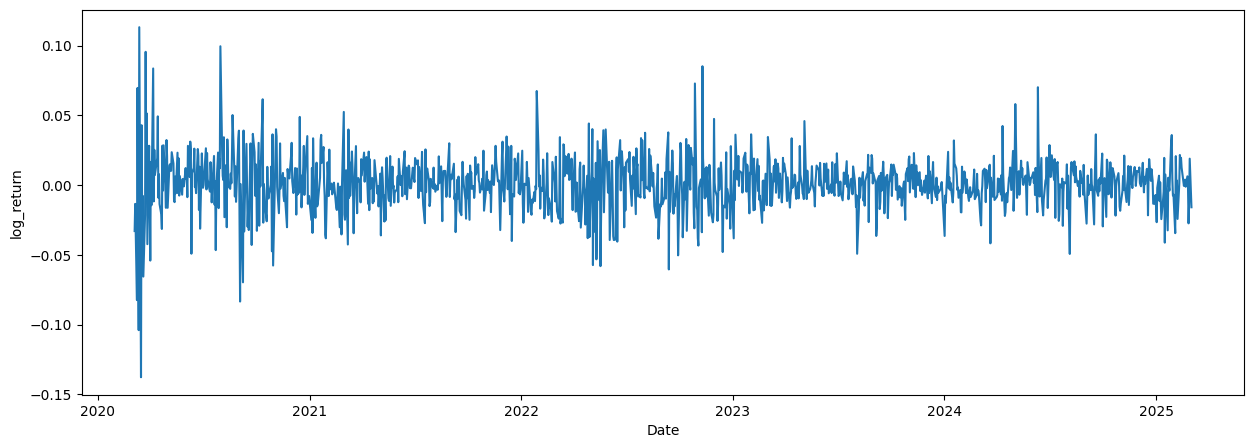

In [20]:
fig, axs = plt.subplots(figsize=(15,5))
sns.lineplot(data_return['log_return'])

In [21]:
data_return.head()

,Close,daily_return,log_return,data_diff
Date,,,,
2020-03-05,71.09,-0.032394,-0.032930,NaN
2020-03-06,70.14,-0.013363,-0.013453,-0.95
2020-03-09,64.59,-0.079127,-0.082434,-5.55
2020-03-10,69.25,0.072147,0.069664,4.66
2020-03-11,66.84,-0.034801,-0.035421,-2.41


Text(0.5, 1.0, 'log return')

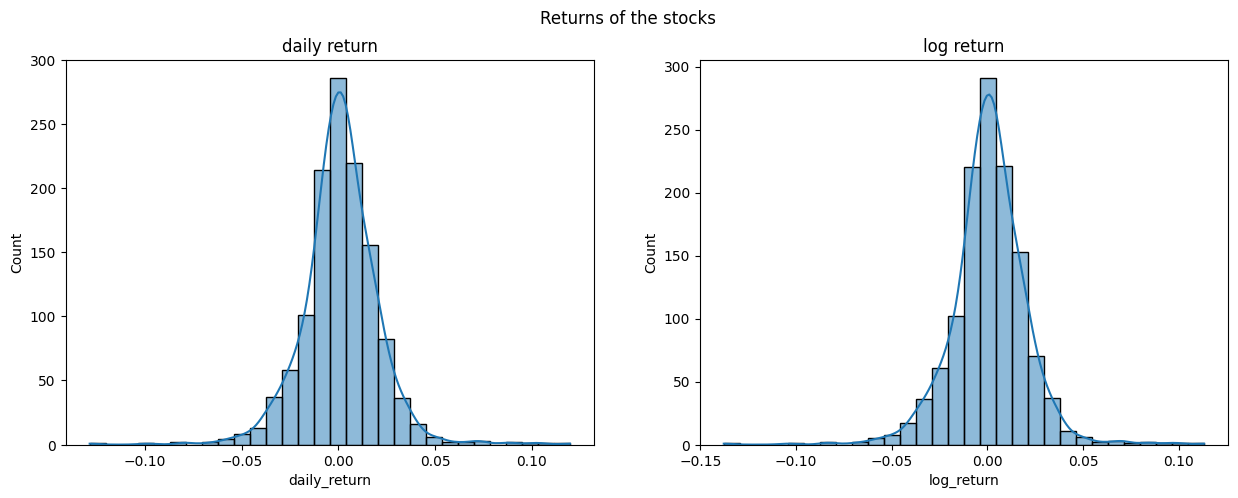

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Returns of the stocks")
sns.histplot(ax = axs[0],data=data_return, x = 'daily_return', bins=30,kde=True)
axs[0].set_title("daily return")
sns.histplot(ax = axs[1], data = data_return,x ='log_return', bins=30,kde=True)
axs[1].set_title("log return")



In [23]:
mean_daily_return = data_return['daily_return'].mean()
std_daily_return = data_return['daily_return'].std()

2.933183732590988

Calculating and  Plotting autocorrelation 

In [ ]:
#data_return['autocorr_20'] = data_return['Close'].rolling(window=20).apply(lambda x: x.autocorr())
#data_return.head(100)

,Close,daily_return,log_return,autocorr_20
Date,,,,
2005-02-28,1.35,0.007463,0.007435,NaN
2005-03-01,1.34,-0.007407,-0.007435,NaN
2005-03-02,1.33,-0.007463,-0.007491,NaN
2005-03-03,1.26,-0.052632,-0.054067,NaN
2005-03-04,1.29,0.023810,0.023530,NaN
...,...,...,...,...
2005-07-14,1.23,0.069565,0.067252,0.530396
2005-07-15,1.25,0.016260,0.016129,0.748827
2005-07-18,1.25,0.000000,0.000000,0.833673


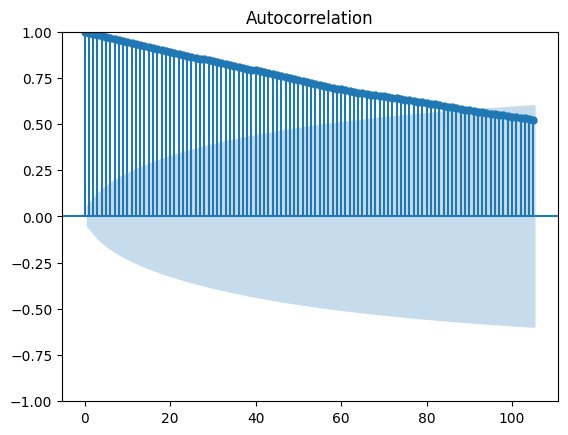

In [24]:
plot_acf(data_return['Close'], lags=105);

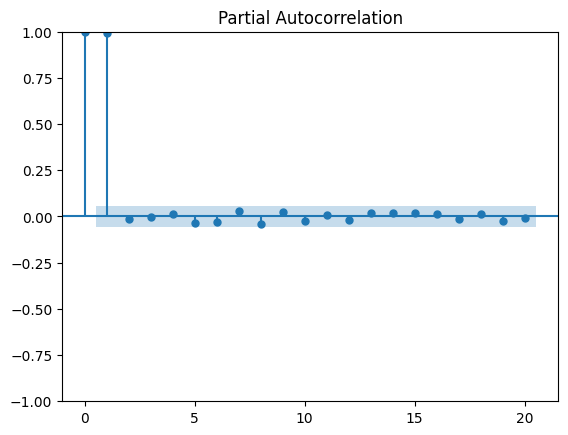

In [25]:
plot_pacf(data_return['Close'], lags=20);

In [26]:
data_return.head(10)

,Close,daily_return,log_return,data_diff
Date,,,,
2020-03-05,71.09,-0.032394,-0.032930,NaN
2020-03-06,70.14,-0.013363,-0.013453,-0.95
2020-03-09,64.59,-0.079127,-0.082434,-5.55
2020-03-10,69.25,0.072147,0.069664,4.66
2020-03-11,66.84,-0.034801,-0.035421,-2.41
2020-03-12,60.24,-0.098743,-0.103965,-6.60
2020-03-13,67.46,0.119854,0.113198,7.22
2020-03-16,58.78,-0.128669,-0.137733,-8.68
2020-03-17,61.36,0.043892,0.042956,2.58


Data Preprocessing

In [27]:
prices = data_return.filter(['Close'])
print(prices)
#convert the dataframe to numpy
dataset = prices.values
print(dataset)


             Close
Date              
2020-03-05   71.09
2020-03-06   70.14
2020-03-09   64.59
2020-03-10   69.25
2020-03-11   66.84
...            ...
2025-02-25  247.04
2025-02-26  240.36
2025-02-27  237.30
2025-02-28  241.84
2025-03-03  238.03

[1255 rows x 1 columns]
[[ 71.09]
 [ 70.14]
 [ 64.59]
 ...
 [237.3 ]
 [241.84]
 [238.03]]


In [71]:
#Get the number of rows to train the model
train_data_len = int(np.ceil(len(dataset) * 0.8))
print(train_data_len)

1004


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [72]:
#Normalise the data
scaler = StandardScaler()
scaled_data  = scaler.fit_transform(dataset)
print(scaled_data)


[[-2.05421725]
 [-2.0768024 ]
 [-2.2087472 ]
 ...
 [ 1.89723244]
 [ 2.00516566]
 [ 1.91458734]]


In [114]:
#Create the training data set
train_data = scaled_data[0:int(train_data_len), :]
print(len(train_data))

#Split into X_train and y_train 
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

    if i <=61:
        print(x_train)
        print(y_train)
        print()

1004
[array([-2.05421725, -2.0768024 , -2.2087472 , -2.09796111, -2.15525606,
       -2.3121634 , -2.14051628, -2.3468732 , -2.2855367 , -2.32119746,
       -2.33213342, -2.42176079, -2.44981392, -2.32000876, -2.32785413,
       -2.25320428, -2.31501626, -2.27412526, -2.27721585, -2.35448083,
       -2.33118247, -2.35139023, -2.22990592, -2.24749856, -2.20922268,
       -2.19804897, -2.1678562 , -2.08821384, -2.10319136, -2.09035348,
       -2.11270089, -2.14645974, -2.19590933, -2.15145225, -2.15763345,
       -2.11174994, -2.11056125, -2.13695021, -2.08417229, -2.04922474,
       -2.07656466, -2.05302856, -2.02759055, -2.00976017, -1.99192979,
       -1.95008784, -1.92203471, -1.94271795, -1.96458988, -1.95365391,
       -1.9641144 , -1.92227245, -1.93273294, -1.89754765, -1.91133648,
       -1.89944956, -1.9120497 , -1.90396659, -1.90325338, -1.90491754])]
[-1.8823323981426043]

[array([-2.05421725, -2.0768024 , -2.2087472 , -2.09796111, -2.15525606,
       -2.3121634 , -2.14051628,

In [118]:
#convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [120]:
y_train.shape

(944,)

In [63]:
#Building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam




In [79]:
#Build the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/Users/shalini/workspace/stock_analysis/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
#Compile the model
model.compile(optimizer='Adam', loss= 'mean_squared_error')

In [82]:
model.fit(x_train, y_train, batch_size = 32, epochs= 50)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1628
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0226
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0140
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0128
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0126
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0115
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0104
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0103
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0095
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0088
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0078
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0078
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0077
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0073
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0068
Epo

In [ ]:
#create a new array containing scaled values 
test_data = scaled_data[train_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
#j=0
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    print(test_data[i-60:i , 0])
    x_test.append(test_data[i-60:i , 0])

#convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#Get the model predicted prices values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) **2)))
rmse



311
60
[0.73231435 0.82669649 0.80054527 0.84666652 0.88066311 0.82099077
 0.85712701 0.9339165  0.93748258 0.92464471 0.8849424  0.90966719
 0.85997987 0.85641379 0.83073805 0.81790017 0.82027756 0.83026257
 0.80553778 0.64268698 0.60987909 0.55448604 0.53736888 0.64078508
 0.6310378  0.65576259 0.64149829 0.64934366 0.59513931 0.5727919
 0.71329528 0.78271489 0.83763246 0.86830071 0.8521345  0.84428913
 0.80292265 0.78675644 0.69950646 0.61344516 0.67145333 0.64767949
 0.69094788 0.72922376 0.73183888 0.70616313 0.72423125 0.68405346
 0.6341284  0.61296969 0.60631301 0.56946356 0.55187092 0.5697013
 0.61819993 0.57445607 0.54236139 0.57707119 0.54854258 0.53261411]
61
[0.82669649 0.80054527 0.84666652 0.88066311 0.82099077 0.85712701
 0.9339165  0.93748258 0.92464471 0.8849424  0.90966719 0.85997987
 0.85641379 0.83073805 0.81790017 0.82027756 0.83026257 0.80553778
 0.64268698 0.60987909 0.55448604 0.53736888 0.64078508 0.6310378
 0.65576259 0.64149829 0.64934366 0.59513931 0.5727919

3.440067687953843

In [129]:
len(x_test)

251

In [137]:
#Plot the data
train = data[:train_data_len]
valid = data[train_data_len+1: ]
valid['Predictions'] = predictions



/var/folders/dw/c3ntnt1x4kn59s38pldw62hr0000gn/T/ipykernel_1085/3245761984.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



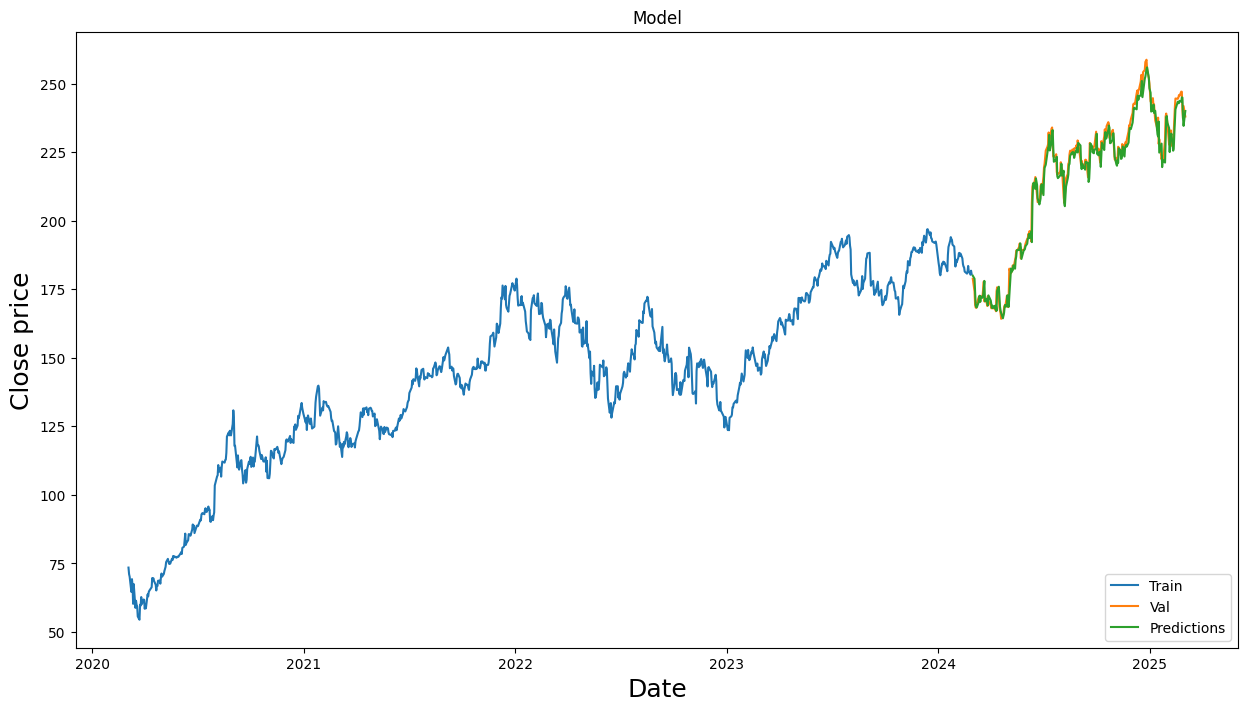

In [133]:
#Visualise the data
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [134]:
import plotly.graph_objs as go

In [136]:
#plt.figure(figsize=(15,8))
#plt.title('Model')
#plt.xlabel('Date', fontsize = 18)
#plt.ylabel('Close price', fontsize = 18)
fig = go.Figure(data=[go.Candlestick(x = data_return.index, close = train['Close'],  uid= valid[['Close', 'Predictions']])])

fig.update_layout(xaxis_rangeslider_visible = True, title ='Model')

fig.show()
#plt.plot(valid[['Close', 'Predictions']])
#plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
#plt.show()

ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'uid' property of candlestick
        Received value:              Close  Predictions
Date                           
2024-03-01  178.82   179.946854
2024-03-04  174.28   178.845795
2024-03-05  169.32   174.174820
2024-03-06  168.33   169.225006
2024-03-07  168.21   168.449280
...            ...          ...
2025-02-25  247.04   244.986832
2025-02-26  240.36   244.907608
2025-02-27  237.30   237.643692
2025-02-28  241.84   234.608170
2025-03-03  238.03   240.020706

[251 rows x 2 columns]

    The 'uid' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [174]:
model = Sequential([Input((2,1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation = 'relu'),
                    Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs = 100)

ValueError: Invalid dtype: datetime64[ns]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_data.shape[0], train_data.shape[1])))

#model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Dense(3,activation='softmax'))
   

IndexError: tuple index out of range